<br><br><center><h1 style="font-size:2em;color:#2467C0">1.88 Million US Wildfires Data Exploration</h1></center>

This data analysis is using an open dataset from Kaggle, 1.88 Million US Wildfires dataset obtained from the United States Department of Agriculture Forest Service. The data contains a spatial database of wildfires that occurred in the United States from 1992 to 2015 - includes 1.88 million geo-referenced wildfire records, representing a total of 140 million acres burned.


Source:

https://www.kaggle.com/rtatman/188-million-us-wildfires

https://www.fs.usda.gov/rds/archive/Product/RDS-2013-0009.4/

## Step 1: Initial exploration of the Dataset

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import calendar
import datetime as dt

import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# connect to the database
conn = sqlite3.connect("FPA_FOD_20170508.sqlite")

In [3]:
# import to pandas
df = pd.read_sql_query("SELECT * FROM fires", conn)

In [4]:
# large dataset in terms of rows and columns. What does it hold?
print(df.shape)
df.head()

(1880465, 39)


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [5]:
df.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,9.889340e+05,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06
mean,9.402330e+05,5.484020e+07,2.003710e+03,2.453064e+06,1.647191e+02,5.979037e+00,2.453238e+06,172.656766,7.452016e+01,3.678121e+01,-9.570494e+01,1.059658e+01
std,5.428436e+05,1.011963e+08,6.663099e+00,2.434573e+03,9.003891e+01,3.483860e+00,2.687548e+03,84.320348,2.497598e+03,6.139031e+00,1.671694e+01,4.404662e+00
min,1.000000e+00,1.000000e+00,1.992000e+03,2.448622e+06,1.000000e+00,1.000000e+00,2.448622e+06,1.000000,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00
25%,4.701170e+05,5.055000e+05,1.998000e+03,2.451084e+06,8.900000e+01,3.000000e+00,2.450701e+06,102.000000,1.000000e-01,3.281860e+01,-1.103635e+02,8.000000e+00
50%,9.402330e+05,1.067761e+06,2.004000e+03,2.453178e+06,1.640000e+02,5.000000e+00,2.453466e+06,181.000000,1.000000e+00,3.545250e+01,-9.204304e+01,1.400000e+01
75%,1.410349e+06,1.910639e+07,2.009000e+03,2.455036e+06,2.300000e+02,9.000000e+00,2.455754e+06,232.000000,3.300000e+00,4.082720e+01,-8.229760e+01,1.400000e+01
max,1.880465e+06,3.003484e+08,2.015000e+03,2.457388e+06,3.660000e+02,1.300000e+01,2.457392e+06,366.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.500000e+01


In [6]:
# checking for nulls
df.isnull().sum()

OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

#### Findings:
- the majority of the columns that will be used in this analysis does not have nulls
- need to convert DISCOVERY_DATE and CONT_DATE to regular time format

In [7]:
# select columns of initial analysis
df['STATE'].unique()

array(['CA', 'NM', 'OR', 'NC', 'WY', 'CO', 'WA', 'MT', 'UT', 'AZ', 'SD',
       'AR', 'NV', 'ID', 'MN', 'TX', 'FL', 'SC', 'LA', 'OK', 'KS', 'MO',
       'NE', 'MI', 'KY', 'OH', 'IN', 'VA', 'IL', 'TN', 'GA', 'AK', 'ND',
       'WV', 'WI', 'AL', 'NH', 'PA', 'MS', 'ME', 'VT', 'NY', 'IA', 'DC',
       'MD', 'CT', 'MA', 'NJ', 'HI', 'DE', 'PR', 'RI'], dtype=object)

#### great all 50 states plus DC and PR

In [8]:
# How many years of data
print(df['FIRE_YEAR'].min())
print(df['FIRE_YEAR'].max())

1992
2015


In [9]:
df.columns.tolist()

['OBJECTID',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIRE_CODE',
 'FIRE_NAME',
 'ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_CODE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_CODE',
 'FIPS_NAME',
 'Shape']

### Selecting certain columns to work on the analysis

In [10]:
fires = pd.read_sql_query("""
SELECT
    FIRE_NAME,
    FIRE_YEAR,
    DISCOVERY_DATE,
    STAT_CAUSE_DESCR,
    CONT_DATE,
    FIRE_SIZE,
    FIRE_SIZE_CLASS,
    LATITUDE,
    LONGITUDE,
    STATE,
    COUNTY
FROM fires""", conn)

In [11]:
fires.head()

,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY
0,FOUNTAIN,2005,2453403.5,Miscellaneous,2453403.5,0.10,A,40.036944,-121.005833,CA,63
1,PIGEON,2004,2453137.5,Lightning,2453137.5,0.25,A,38.933056,-120.404444,CA,61
2,SLACK,2004,2453156.5,Debris Burning,2453156.5,0.10,A,38.984167,-120.735556,CA,17
3,DEER,2004,2453184.5,Lightning,2453189.5,0.10,A,38.559167,-119.913333,CA,3
4,STEVENOT,2004,2453184.5,Lightning,2453189.5,0.10,A,38.559167,-119.933056,CA,3


The DISCOVERY_DATE and CONT_DATE columns are in the Julian date format. Converting them to regular date formats

In [12]:
# convert discovery date
fires['D_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [13]:
fires.head()

,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,D_DATE
0,FOUNTAIN,2005,2453403.5,Miscellaneous,2453403.5,0.10,A,40.036944,-121.005833,CA,63,2005-02-02
1,PIGEON,2004,2453137.5,Lightning,2453137.5,0.25,A,38.933056,-120.404444,CA,61,2004-05-12
2,SLACK,2004,2453156.5,Debris Burning,2453156.5,0.10,A,38.984167,-120.735556,CA,17,2004-05-31
3,DEER,2004,2453184.5,Lightning,2453189.5,0.10,A,38.559167,-119.913333,CA,3,2004-06-28
4,STEVENOT,2004,2453184.5,Lightning,2453189.5,0.10,A,38.559167,-119.933056,CA,3,2004-06-28


In [14]:
# add month and week day
fires['D_MONTH'] = fires['D_DATE'].dt.month
fires['D_DAY_OF_WEEK'] = fires['D_DATE'].dt.weekday_name

In [15]:
# convert month integers to month abbreviations
fires['D_MONTH'] = fires['D_MONTH'].apply(lambda x: calendar.month_abbr[x])

In [16]:
# convert containment date
fires['C_DATE'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [17]:
# adding burn days
fires['BURN_DAYS'] = fires['C_DATE'] - fires['D_DATE']

In [18]:
# converting burn days to a float
fires['BURN_DAYS'] = fires['BURN_DAYS'].astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)

In [19]:
# no need for the Disc Date and Cont Date columns
del fires['DISCOVERY_DATE']
del fires['CONT_DATE']

In [20]:
fires.head()

,FIRE_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,D_DATE,D_MONTH,D_DAY_OF_WEEK,C_DATE,BURN_DAYS
0,FOUNTAIN,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA,63,2005-02-02,Feb,Wednesday,2005-02-02,0.0
1,PIGEON,2004,Lightning,0.25,A,38.933056,-120.404444,CA,61,2004-05-12,May,Wednesday,2004-05-12,0.0
2,SLACK,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA,17,2004-05-31,May,Monday,2004-05-31,0.0
3,DEER,2004,Lightning,0.10,A,38.559167,-119.913333,CA,3,2004-06-28,Jun,Monday,2004-07-03,5.0
4,STEVENOT,2004,Lightning,0.10,A,38.559167,-119.933056,CA,3,2004-06-28,Jun,Monday,2004-07-03,5.0


In [21]:
# looking at # of burn days
fires['BURN_DAYS'].value_counts().sort_index()

0.0       806199
1.0       104954
2.0        24476
3.0        11641
4.0         6772
5.0         4671
6.0         3437
7.0         2874
8.0         2046
9.0         1689
10.0        1566
11.0        1248
12.0        1016
13.0         850
14.0         750
15.0         718
16.0         579
17.0         596
18.0         515
19.0         444
20.0         433
21.0         393
22.0         361
23.0         325
24.0         280
25.0         282
26.0         278
27.0         283
28.0         263
29.0         233
           ...  
365.0         40
366.0         19
367.0          2
368.0          1
369.0          1
370.0          2
371.0          3
374.0          2
375.0          1
378.0          1
379.0          1
397.0          1
730.0          2
731.0          4
732.0          1
735.0          2
1096.0         7
1097.0         1
1101.0         1
1461.0         3
1464.0         1
1826.0         2
1827.0         2
1881.0         1
2557.0         2
2558.0         1
3287.0         2
3652.0        

In [22]:
# interesting that there are burn days greater than six months let alone a year
# let's take a peak at greater than a year
greater_than_year = fires[fires['BURN_DAYS'] > 365]
greater_than_year.sort_values('FIRE_SIZE_CLASS')

,FIRE_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,D_DATE,D_MONTH,D_DAY_OF_WEEK,C_DATE,BURN_DAYS
132471,WATTERMILL,2000,Debris Burning,0.10,A,43.863889,-85.804167,MI,085,2000-04-14,Apr,Friday,2002-04-14,730.0
372614,NO NAME 83,2008,Smoking,0.10,A,33.798000,-116.301000,CA,None,2008-02-18,Feb,Monday,2009-02-18,366.0
372657,NO NAM 19,2008,Miscellaneous,0.10,A,32.669000,-116.824000,CA,None,2008-01-28,Jan,Monday,2009-01-28,366.0
716180,SNAG,2004,Lightning,0.10,A,43.162210,-121.891280,OR,18,2004-08-14,Aug,Saturday,2005-08-15,366.0
720314,TOWER,2000,Campfire,0.01,A,44.031730,-122.904520,OR,20,2000-07-06,Jul,Thursday,2007-07-07,2557.0
725676,SQUAW VALLEY #2,2002,Debris Burning,0.25,A,42.501090,-124.369460,OR,8,2002-10-31,Oct,Thursday,2007-10-31,1826.0
744205,None,1992,Missing/Undefined,0.20,A,34.358333,-79.508333,SC,33,1992-05-27,May,Wednesday,1997-05-28,1827.0
1747769,WA-FA-001,2014,Campfire,0.10,A,37.088696,-113.638745,UT,WASHINGTON,2014-05-06,May,Tuesday,2015-05-08,367.0
758718,ROCKY CREEK,2003,Smoking,0.25,A,44.775480,-124.060610,OR,21,2003-07-05,Jul,Saturday,2005-07-05,731.0
771282,ZUNI #1,1999,Children,0.20,A,44.002470,-121.376830,OR,17,1999-07-12,Jul,Monday,2000-07-12,366.0


In [23]:
print(len(fires[fires['BURN_DAYS'] > 365]))
print(' ')
print(greater_than_year['FIRE_SIZE_CLASS'].value_counts())

72
 
A    29
B    22
D     7
C     7
E     5
F     1
G     1
Name: FIRE_SIZE_CLASS, dtype: int64


- So 72 fires greater than a year with the majority less than 10 acres in size.
- reserched the largest fire 'SIXTEEN COMPLEX and according to wiki it was contained in a week
- to me it's not significant to remove 72 records 

## Step 2: Initial analysis of the Dataset

### CAUSES

In [69]:
fires['STAT_CAUSE_DESCR'].unique()

array(['Miscellaneous', 'Lightning', 'Debris Burning', 'Campfire',
       'Equipment Use', 'Arson', 'Children', 'Railroad', 'Smoking',
       'Powerline', 'Structure', 'Fireworks', 'Missing/Undefined'],
      dtype=object)

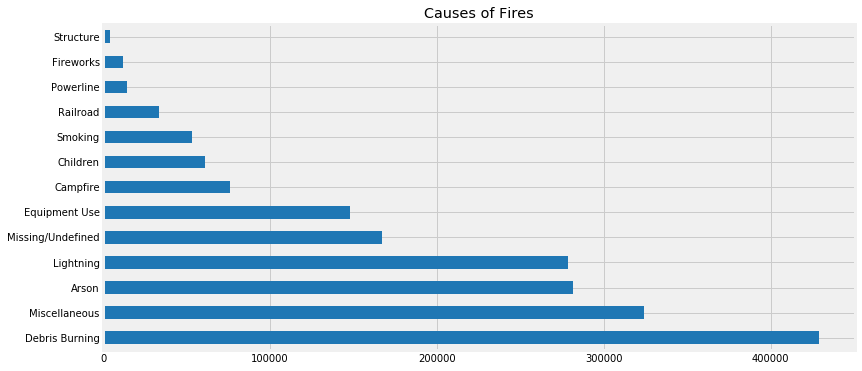

In [24]:
fires['STAT_CAUSE_DESCR'].value_counts().plot.barh(figsize=(12, 6), color='tab:blue', title='Causes of Fires')

Findings
- Debris buring is by far the biggest
- like to understand the Miscellaneous and Missing/Undefined catagories - why so many?
    - will explore more when I start learning ML
- Arson and Lightening very close third and fourth  

### BY YEAR

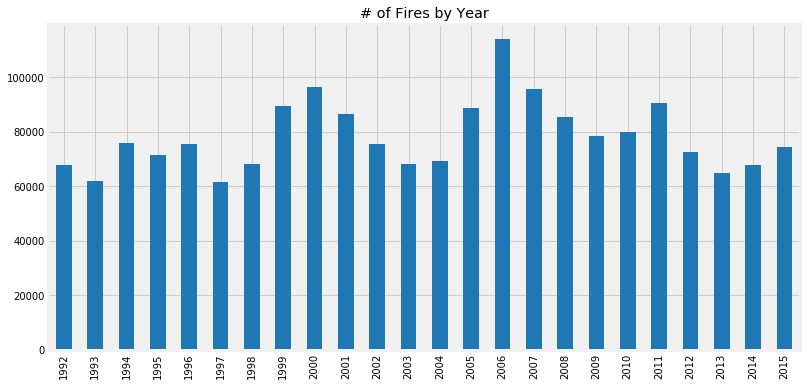

In [25]:
fires['FIRE_YEAR'].value_counts().sort_index().plot.bar(figsize=(12, 6), color='tab:blue',title='# of Fires by Year')

In [26]:
print(fires['FIRE_YEAR'].value_counts().min())
print(fires['FIRE_YEAR'].value_counts().max())
print(fires['FIRE_YEAR'].value_counts().mean())

61450
114004
78352.70833333333


The number of fires ranges from 60,000 to over 110,000 between 1992 and 2015. The peak is 2006 at 114,004; There is a small updward trend in this time period (need to figure out how to add a trendline in matplotlib) 

### BY Month

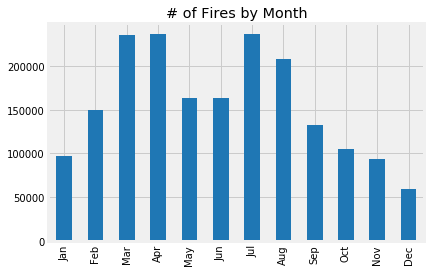

In [27]:
# getting the months in calendar order
monthly = fires['D_MONTH'].value_counts()
monthly.index = pd.CategoricalIndex(monthly.index, 
                categories=['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
monthly = monthly.sort_index()
monthly.plot.bar( color='tab:blue',title='# of Fires by Month')

In [28]:
# function to return specific catagories of causes by month
def fire_by_month(desc):
    sub_df = fires[fires['STAT_CAUSE_DESCR'] == desc]
    month = sub_df['D_MONTH'].value_counts()
    month.index = pd.CategoricalIndex(month.index, 
                categories=['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
    month = month.sort_index()
    plot = month.plot.bar( color='tab:blue',title='# of ' + desc +' Fires by Month')
    return plot

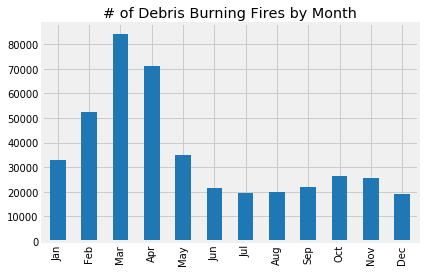

In [29]:
fire_by_month('Debris Burning')

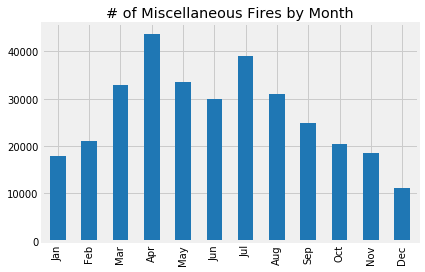

In [30]:
fire_by_month('Miscellaneous')

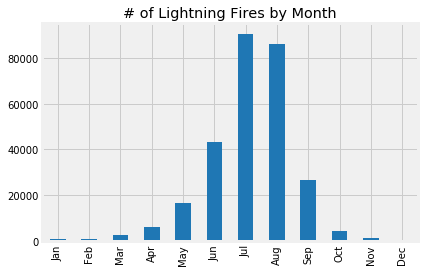

In [31]:
fire_by_month('Lightning')

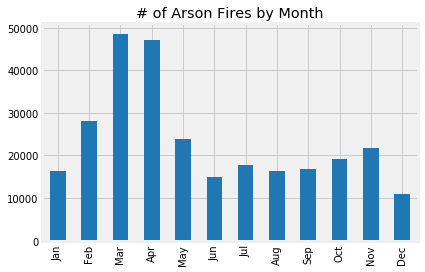

In [32]:
fire_by_month('Arson')

### Snapshot of the top fire months Mar/Apr/Jul/Aug + Dec

In [33]:
# function to return causes by month
def causes_by_month(month):
    c_month = fires[fires['D_MONTH'] == month]
    plot = c_month['STAT_CAUSE_DESCR'].value_counts().plot.barh( color='tab:blue', title='Causes of Fires in ' + month)
    return plot

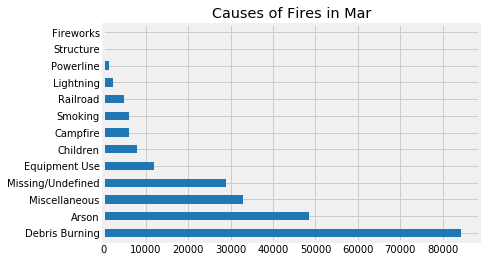

In [34]:
causes_by_month('Mar')

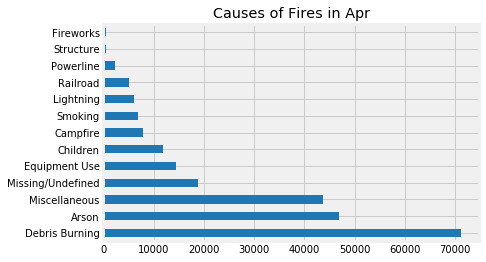

In [35]:
causes_by_month('Apr')

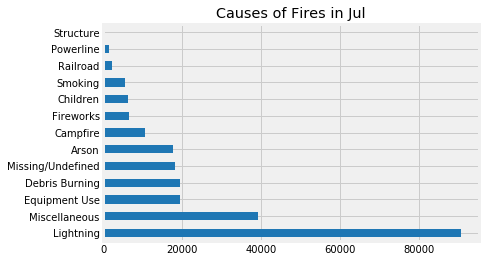

In [36]:
causes_by_month('Jul')

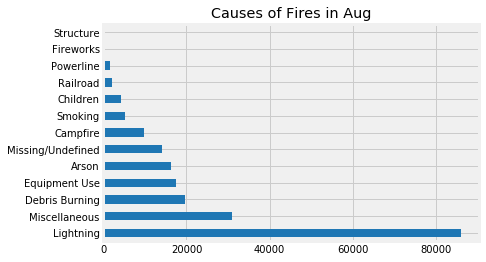

In [37]:
causes_by_month('Aug')

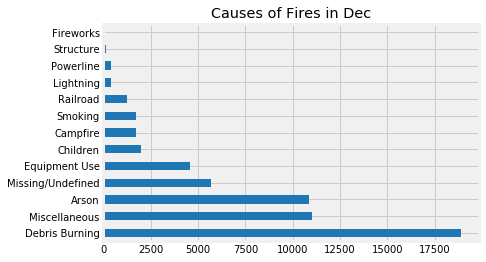

In [38]:
causes_by_month('Dec')

- Debris Burning is the largest cause of fires in March / April followed by Arson
- In the summer months of July and August Lightning far oupaces all causes
- December has the lowest total of fires but is led by Debris Burning

### Fires by Day of Week (dow)

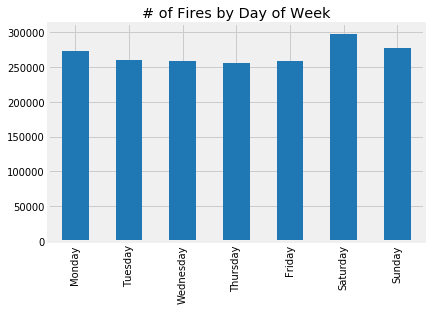

In [39]:
# getting the day of week in week order
dow = fires['D_DAY_OF_WEEK'].value_counts()
dow.index = pd.CategoricalIndex(dow.index, 
                categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
dow = dow.sort_index()
dow.plot.bar(color='tab:blue',title='# of Fires by Day of Week')

Fires are slightly more likely to start on the weekend probably due to debris but lets find out. 

In [40]:
def fire_by_dow(desc):
    dow_df = fires[fires['STAT_CAUSE_DESCR'] == desc]
    dow = dow_df['D_DAY_OF_WEEK'].value_counts()
    
    dow.index = pd.CategoricalIndex(dow.index, 
                categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
    dow = dow.sort_index()
    plot = dow.plot.bar(color='tab:blue',title='Caused by ' + desc)
    return plot

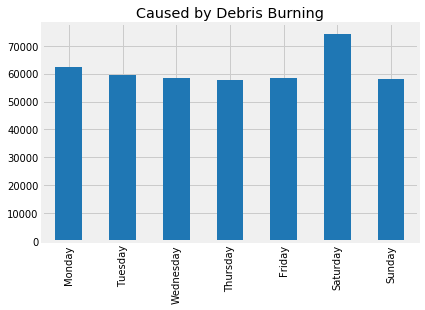

In [41]:
fire_by_dow('Debris Burning')

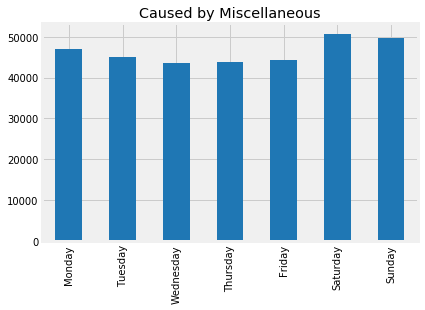

In [42]:
fire_by_dow('Miscellaneous')

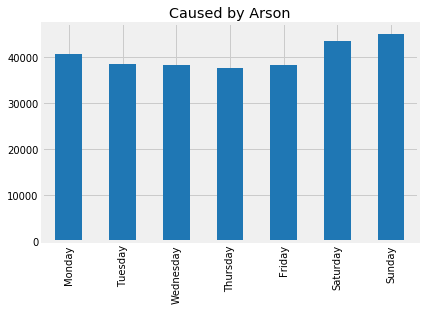

In [43]:
fire_by_dow('Arson')

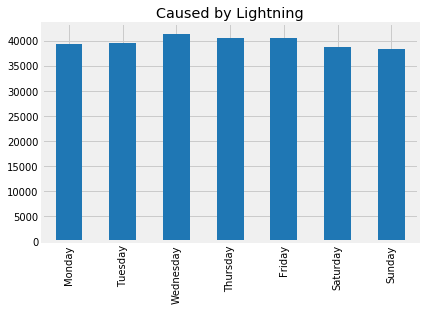

In [44]:
fire_by_dow('Lightning')

- Saturdays are the biggest day of the week for Debris and Misc (wonder is some of the misc is actually debris).
- Sundays followed closely by Saturdays are the biggest days for Arson.
- Interestingly, lightening is slightly ahead on Wednesdays but is relatively even across day of week.


### Fires by State - Top Ten

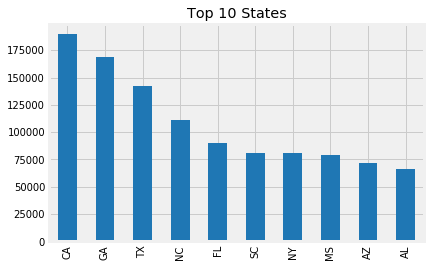

In [45]:
fires['STATE'].value_counts()[0:10].plot.bar( color='tab:blue',title='Top 10 States')

- Expected CA and TX based on size and climate (not surprised AZ at 9 but expected CO and/or NM to show given their climates) but surprised by the # of southern states showing up in the top 10.
- Lets look at the top 5 in more detail

In [46]:
# function to return causes in specific states

def causes_by_state(state):
    state_df = fires[fires['STATE']==state]
    st = state_df['STAT_CAUSE_DESCR'].value_counts()
    plot = st.plot.barh( color='tab:blue', title='Causes of Fires in ' + state)
    return plot

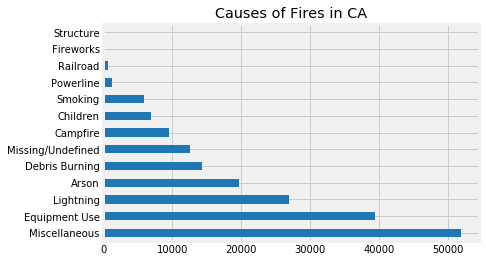

In [47]:
causes_by_state('CA')

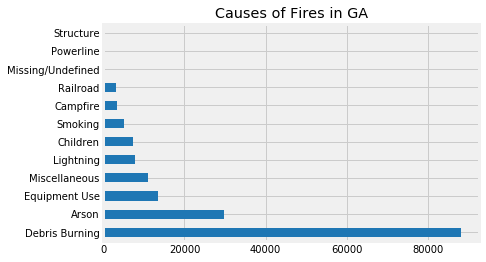

In [48]:
causes_by_state('GA')

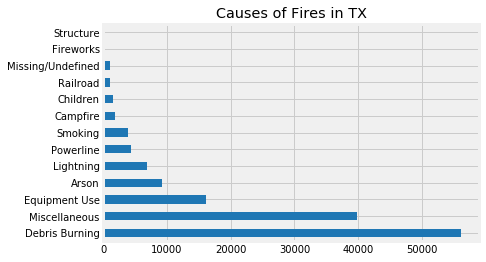

In [49]:
causes_by_state('TX')

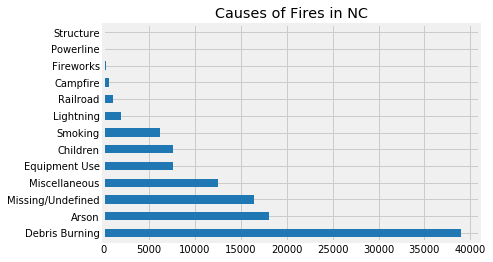

In [50]:
causes_by_state('NC')

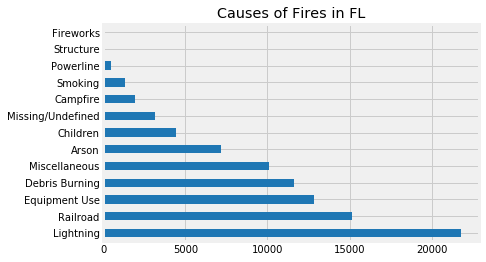

In [51]:
causes_by_state('FL')

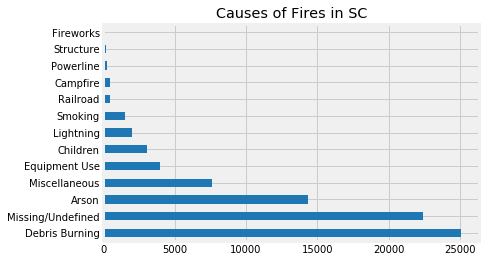

In [52]:
causes_by_state('SC')

- CA is led by Misc, followed by Equipment Use and Lightning 
- GA, TX, NC and SC are all led by Debris Burning; In GA Arson is second
- FL is led by Lightning followed by Railroad (seems odd need to invesigate further)

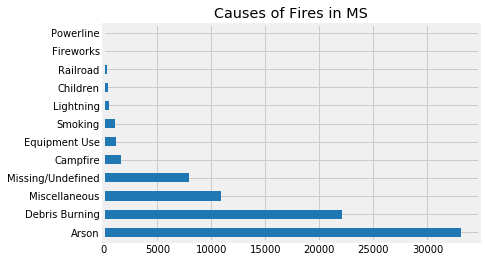

In [53]:
causes_by_state('MS')

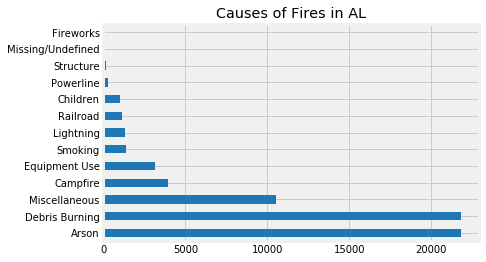

In [54]:
causes_by_state('AL')

- I show MS and AL assuming Debris Burning would be first but no, it's Arson???

In [55]:
# how many unique fire sizes
print(len(fires['FIRE_SIZE'].unique()))

13637


In [56]:
fires['FIRE_SIZE_CLASS'].value_counts()

B    939376
A    666919
C    220077
D     28427
E     14107
F      7786
G      3773
Name: FIRE_SIZE_CLASS, dtype: int64

#### there are over 13,000 unique sizes in FIRE_SIZE so I'll use the FIRE_SIZE_CLASS by acres

- 'A' = '0-0.25'
- 'B' = '0.26-9.9'
- 'C' = '10.0-99.9'
- 'D' = '100-299'
- 'E' = '300-999'
- 'F' = '1000-4999'
- 'G' = '5000+')

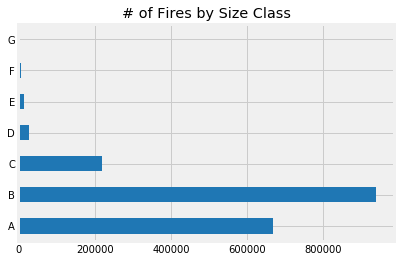

In [57]:
fires['FIRE_SIZE_CLASS'].value_counts().sort_index().plot.barh( color='tab:blue',title='# of Fires by Size Class')

In [58]:
# function to return causes by size class

def causes_by_class(class_size):
    class_df = fires[fires['FIRE_SIZE_CLASS']==class_size]
    st = class_df['STAT_CAUSE_DESCR'].value_counts()
    plot = st.plot.barh( color='tab:blue', title='Causes of Fires by Size Class ' + class_size)
    return plot

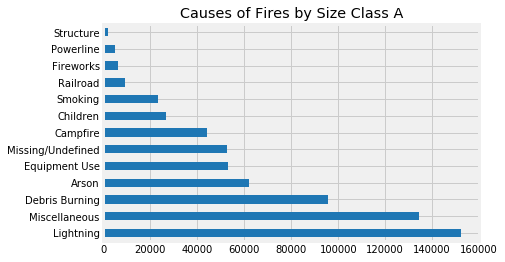

In [59]:
causes_by_class('A')

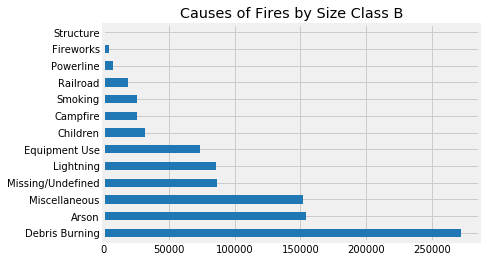

In [60]:
causes_by_class('B')

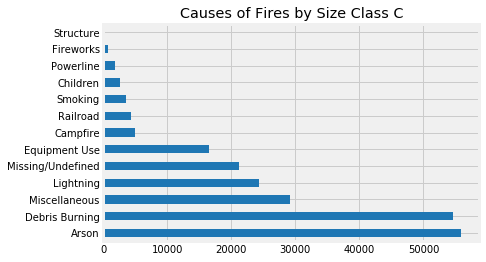

In [61]:
causes_by_class('C')

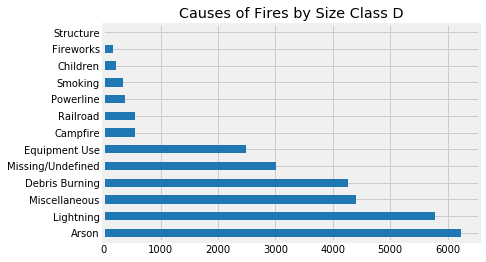

In [62]:
causes_by_class('D')

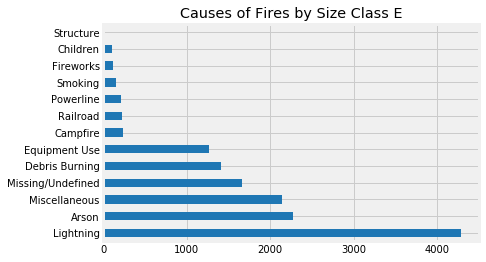

In [63]:
causes_by_class('E')

- Class A is lightening, which I imagine is lightening striking homes or buildings
- Class B & C is either Debris Burning or Arson causes
- Class E, (F & G not shown) are caused by lightning which i imagine are the larger forest fires in remote locations

FIRE_SIZE_CLASS
A     1.028552
B     0.789093
C     1.236716
D     4.117176
E     7.406832
F    14.321441
G    32.397392
Name: BURN_DAYS, dtype: float64


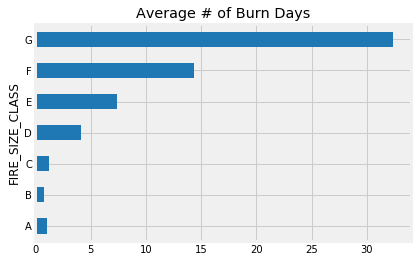

In [64]:
# lets explore size and burn time

print(fires.groupby('FIRE_SIZE_CLASS')['BURN_DAYS'].mean())
fires.groupby('FIRE_SIZE_CLASS')['BURN_DAYS'].mean().plot.barh(color='tab:blue', title='Average # of Burn Days')

- this makes sense, the larger the fire, the longer burn time
- interesting to see fire size class B is less than a day where fire size class A which is less than a quater acre is slightly over a day


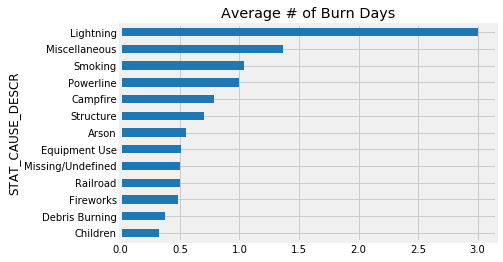

In [65]:
# lets explore causes and burn time
fires.groupby('STAT_CAUSE_DESCR')['BURN_DAYS'].mean().sort_values().plot.barh( color='tab:blue', title='Average # of Burn Days')

In [66]:
# exporting for a visualtization in Tableau

fires.to_csv('fires_df.csv')